## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Dataset

In [4]:
data=pd.read_csv('data_for_lr.csv')

In [30]:
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [6]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


## Data Preprocessing

### Handling Null Values

In [9]:
data=data.dropna()
print("Shape of the dataset = {}".format(data.shape))

Shape of the dataset = (699, 2)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splitting Data

In [13]:
# training dataset and labels
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_input.shape))
print("Train Output Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output Shape = (199, 1)


##  Linear Regression 

### Forward Propagation


#### f(x) = m*x + c ; where m and c are parameters that will learn through training

In [15]:
def forward_propagation(train_input, parameters):
    m=parameters['m']
    c=parameters['c']
    predictions=np.multiply(train_input, m)+c
    return predictions

### Defining Cost Function

#### Mean Squared Error, Cost = [ (y - f(x)) ^ 2] * 0.5 
Here y is the true value and f(x) is the predicted value

In [17]:
def cost_function(predictions, train_output):
    cost=np.mean((train_output - predictions)**2)*0.5
    return cost

### Gradient Descent for Back-Propagation

Using Chain Rule :

1. Cost
2. f=f(x)

Partial Derivative of cost function w.r.t. m => dcost/dm = dcost/df * df/dm

Partial Derivative of cost function w.r.t. c => dcost/dc = dcost/df * df/dc

Partial Derivatives:

1. dc/df = (y-f) * -1
2. df/dw = x
3. df/db = 1

In [19]:
def backward_propagation(train_input, train_output, predictions):
    derivatives=dict()
    df=(train_output - predictions)*-1
    dm=np.mean(np.multiply(train_input, df))
    dc=np.mean(df)
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

### Update Parameters

1. m=m-(learning_rate*dm)
2. c=c-(learning_rate*dc)

In [21]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m']=parameters['m']-learning_rate*derivatives['dm']
    parameters['c']=parameters['c']-learning_rate*derivatives['dc']
    return parameters

### Train Data

Sequence of Steps:

1. Forward Propagation
2. Cost Function
3. Backward Propagation
4. Update Parameters

In [25]:
def train(train_input, train_output, learning_rate, iters):
    
    # random parameters
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)*-1
    parameters['c']=np.random.uniform(0,1)*-1
    
    plt.figure()
    
    # loss
    loss=list()
    
    # iterate
    for i in range(iters):
        
        # forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        # cost function
        cost=cost_function(predictions, train_output)
        
        # append lost and print
        loss.append(cost)
        print("Iteration = {}, Loss={}".format(i+1, cost))
        
        # plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        
        legend=ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')
        
        plt.show()
        
        # back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss=3225.532408830611


<Figure size 432x288 with 0 Axes>

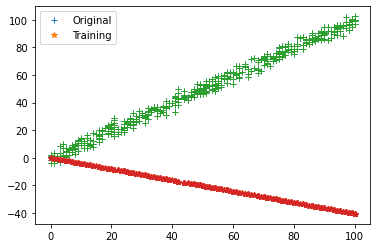

Iteration = 2, Loss=1465.563899298586


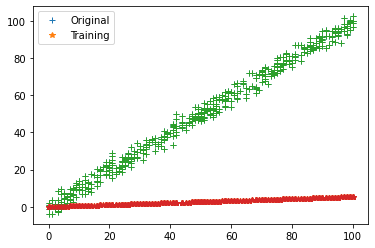

Iteration = 3, Loss=667.0642371078728


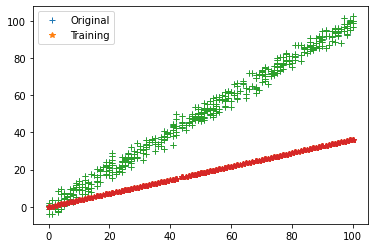

Iteration = 4, Loss=304.7840559184348


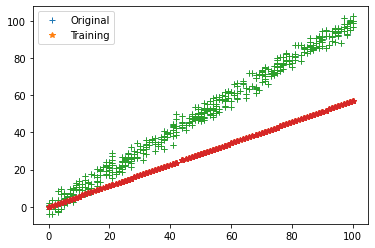

Iteration = 5, Loss=140.41713643395084


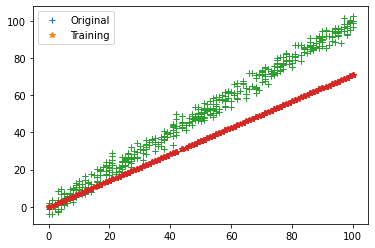

Iteration = 6, Loss=65.84368300189018


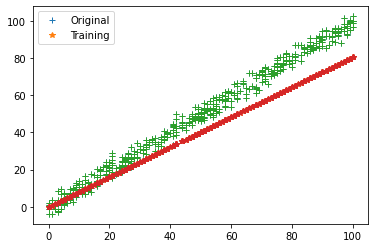

Iteration = 7, Loss=32.00962457675783


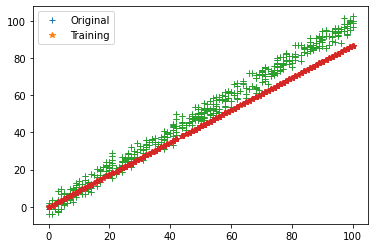

Iteration = 8, Loss=16.659074790901904


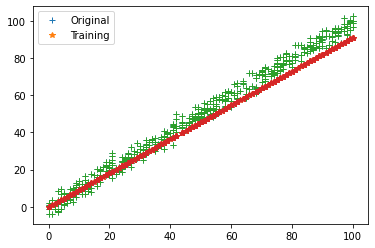

Iteration = 9, Loss=9.694513347781823


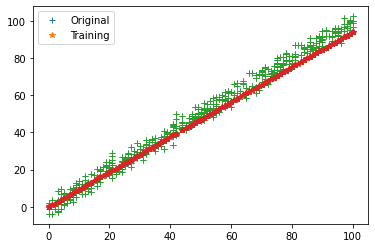

Iteration = 10, Loss=6.534684104427385


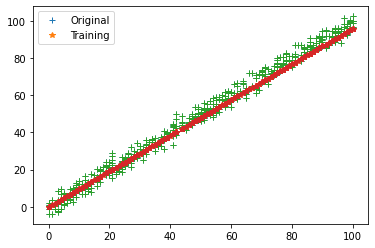

Iteration = 11, Loss=5.101066074384945


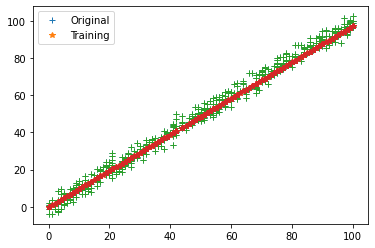

Iteration = 12, Loss=4.450631983844967


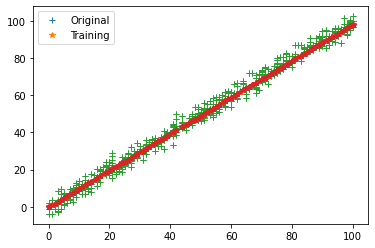

Iteration = 13, Loss=4.155529314144171


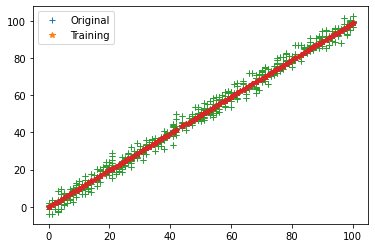

Iteration = 14, Loss=4.021640903657964


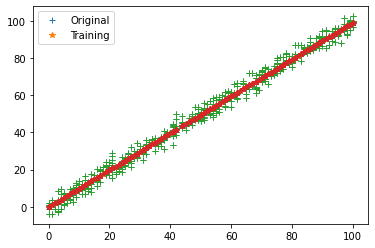

Iteration = 15, Loss=3.9608955811450923


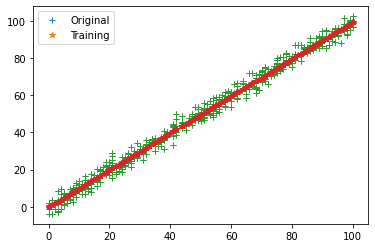

Iteration = 16, Loss=3.9333353586621445


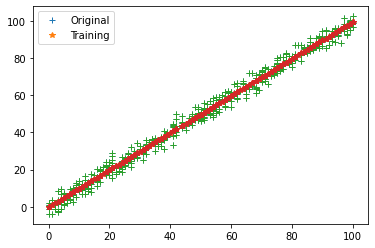

Iteration = 17, Loss=3.9208312528200717


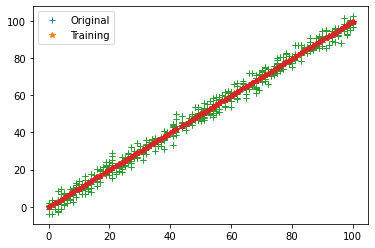

Iteration = 18, Loss=3.9151581237748623


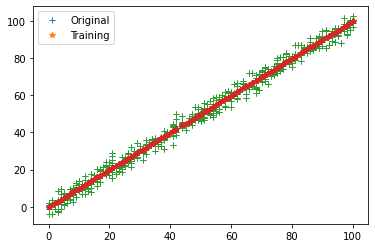

Iteration = 19, Loss=3.9125842164687805


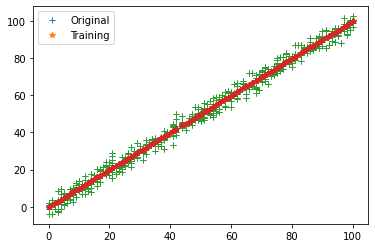

Iteration = 20, Loss=3.9114164294986864


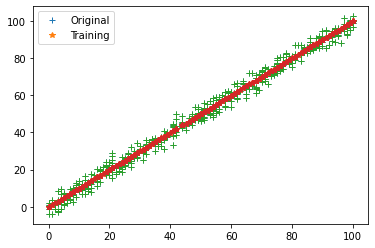

In [26]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

### Let's Predict


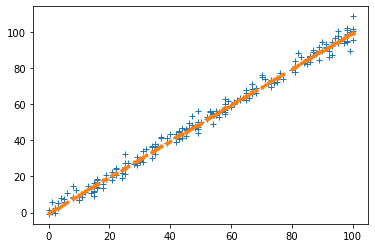

In [28]:
test_predictions = test_input * parameters['m'] + parameters['c']
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

### Cost for Test Data

In [29]:
cost_function(test_predictions, test_output)

4.022371574827298